In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Carregando os dados

In [ ]:
train_df = pd.read_csv('/content/train_Sleep_health_and_lifestyle_dataset.csv')
val_def = pd.read_csv('/content/val_Sleep_health_and_lifestyle_dataset.csv')
test_df = pd.read_csv('/content/test_Sleep_health_and_lifestyle_dataset.csv')


In [ ]:
target = 'Quality of Sleep'

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_val = val_def.drop(columns=[target])
y_val = val_def[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]

Salvando ordem das colunas

In [ ]:
model_columns = list(X_train.columns)
joblib.dump(model_columns, 'colunas_modelo_lasso.joblib')

['colunas_modelo_lasso.joblib']

Treinando modelo Lasso

In [ ]:
Lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)

Lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000, random_state=42)

Avaliação

In [ ]:
def avaliar(modelo, X, y, nome):
  preds = modelo.predict(X)

  mae = mean_absolute_error(y, preds)
  rmse = np.sqrt(mean_squared_error(y, preds))
  r2 = r2_score(y, preds)

  print(f"Resultados - {nome}")
  print(f"r2:   {r2:.4f}")
  print(f"MAE:   {mae:.4}")
  print(f"RMSE:   {rmse:.4f}")


In [ ]:
avaliar(Lasso, X_train, y_train, "treino")
avaliar(Lasso, X_val, y_val, "validação")
avaliar(Lasso, X_test, y_test, "teste")

Resultados - treino
r2:   0.9375
MAE:   0.2898
RMSE:   0.3707
Resultados - validação
r2:   0.9130
MAE:   0.2724
RMSE:   0.3610
Resultados - teste
r2:   0.8984
MAE:   0.2801
RMSE:   0.3812


Salvando modelo

In [ ]:
joblib.dump(Lasso, 'modelo_lasso_sleep.joblib')

['modelo_lasso_sleep.joblib']

Previsao vs valores reais

In [ ]:
preds_test = Lasso.predict(X_test)

comparacao = pd.DataFrame({
    'Real': y_test[:15],
    'Predito': preds_test[:15]
})

print(comparacao)

    Real   Predito
0      6  6.189278
1      6  5.418296
2      6  6.189278
3      6  5.802244
4      7  6.528120
5      8  8.180712
6      8  8.002256
7      6  5.936593
8      9  9.038084
9      8  7.919664
10     7  7.523740
11     7  6.939141
12     8  7.929305
13     9  8.783967
14     8  7.771016


Importância das variáveis

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': Lasso.coef_
})

coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values('Importancia', ascending=False)

print("\nTop 10 variáveis mais importantes:")
print(coef_df.head(10))


Top 10 variáveis mais importantes:
                   Feature  Coeficiente  Importancia
1           Sleep Duration     0.520511     0.520511
3             Stress Level    -0.463242     0.463242
4               Heart Rate    -0.349721     0.349721
5              Daily Steps     0.132639     0.132639
2  Physical Activity Level     0.033035     0.033035
0                      Age     0.031528     0.031528
6             BMI Category    -0.000000     0.000000
7              BP_Category    -0.000000     0.000000
8            Gender_Female     0.000000     0.000000
9              Gender_Male    -0.000000     0.000000


Gráfico simples dos coeficientes

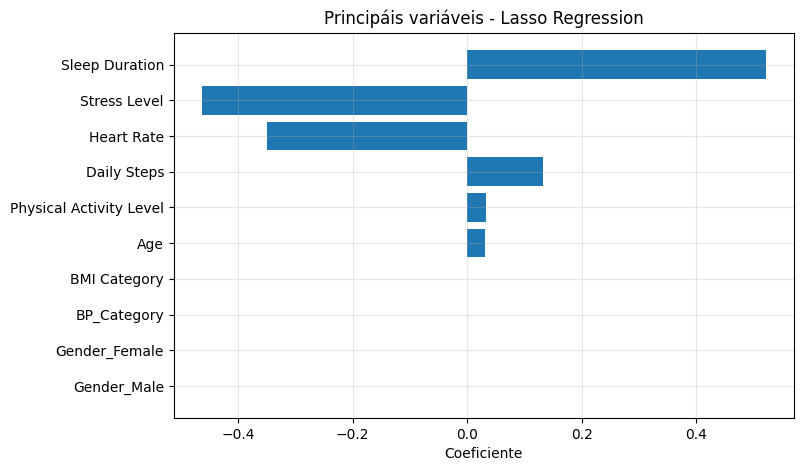

In [ ]:
top = coef_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top['Feature'], top['Coeficiente'])
plt.title("Principáis variáveis - Lasso Regression")
plt.xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.show()

Análise básica de resíduos

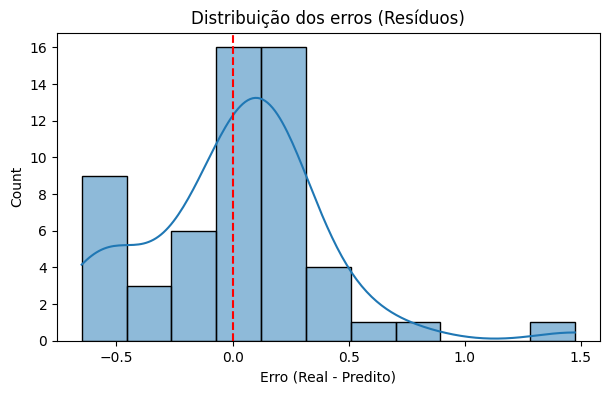

In [ ]:
from matplotlib.lines import Line2D
residuos = y_test - preds_test

plt.figure(figsize=(7,4))
sns.histplot(residuos, kde=True)
plt.axvline(0, color='red', linestyle= '--')
plt.title("Distribuição dos erros (Resíduos)")
plt.xlabel("Erro (Real - Predito)")
plt.show()